### Word Embeddings with Word2Vec on a Text Corpus

In [6]:
pip install gensim nltk scikit-learn matplotlib pandas


In [7]:
import nltk
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ines\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

#### 1. Text Preprocessing

##### Step 1: Load a text corpus (e.g., a small collection of sentences)

In [8]:
corpus = """
Natural language processing (NLP) is a sub-field of artificial intelligence.
Machine learning is transforming the field of NLP.
Deep learning techniques, such as word embeddings, are revolutionizing the industry.
Word2Vec is one of the most popular models for word representation.
These word embeddings are used in many NLP applications.
Natural language processing is becoming more prevalent with the rise of AI.
"""

##### Step 2: Tokenize the sentences

In [9]:
# Split text into sentences
sentences = nltk.sent_tokenize(corpus)

# Tokenize each sentence into words
tokenized_sentences = [nltk.word_tokenize(sentence.lower()) for sentence in sentences]

print(tokenized_sentences)

[['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'a', 'sub-field', 'of', 'artificial', 'intelligence', '.'], ['machine', 'learning', 'is', 'transforming', 'the', 'field', 'of', 'nlp', '.'], ['deep', 'learning', 'techniques', ',', 'such', 'as', 'word', 'embeddings', ',', 'are', 'revolutionizing', 'the', 'industry', '.'], ['word2vec', 'is', 'one', 'of', 'the', 'most', 'popular', 'models', 'for', 'word', 'representation', '.'], ['these', 'word', 'embeddings', 'are', 'used', 'in', 'many', 'nlp', 'applications', '.'], ['natural', 'language', 'processing', 'is', 'becoming', 'more', 'prevalent', 'with', 'the', 'rise', 'of', 'ai', '.']]


#### 2. Train a Word2Vec Model

##### Train the Word2Vec model on the tokenized sentences

In [10]:
# Train Word2Vec model
model = Word2Vec(sentences=tokenized_sentences, vector_size=20, window=2, min_count=1, workers=4)

# Print a sample word vector for "nlp"
print("Word Vector for 'nlp':\n", model.wv['nlp'])


Word Vector for 'nlp':
 [-0.04313609  0.01836386  0.02593212  0.02869925  0.03738099 -0.03083979
  0.00556081  0.03020607 -0.01420551 -0.03082686 -0.00206781 -0.04187631
 -0.02794586  0.0355284   0.01681667  0.03612844  0.03400088  0.03764498
 -0.01893416 -0.00285061]


#### 3. Word Vector Visualization

##### Step 1: Extract word vectors for a few words

In [11]:
# Select a few words for visualization
words = ["nlp", "learning", "deep", "word2vec", "ai", "techniques", "embeddings"]

# Extract word vectors
word_vectors = [model.wv[word] for word in words]

# Reduce the dimensionality to 2D using PCA
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

# Create a DataFrame for easier visualization
df = pd.DataFrame(word_vectors_2d, index=words, columns=['x', 'y'])


##### Step 2: Plot the word vectors in 2D

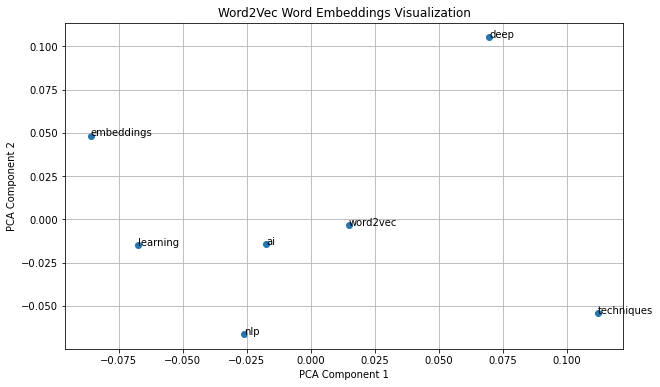

In [12]:
# Plot the word vectors in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'])

# Annotate each word at its vector location
for word, pos in df.iterrows():
    plt.annotate(word, pos)

plt.title("Word2Vec Word Embeddings Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


#### 4.Exploring Similarity between Words

##### Step 1: Find similar words

In [13]:
# Find words similar to 'nlp'
similar_words_nlp = model.wv.most_similar('nlp', topn=3)
print("Most similar words to 'nlp':\n", similar_words_nlp)


Most similar words to 'nlp':
 [('artificial', 0.5350016951560974), ('.', 0.3959263265132904), ('sub-field', 0.3877207934856415)]


##### Step 2: Evaluate word similarity

In [14]:
# Evaluate similarity between two words
similarity_score = model.wv.similarity('nlp', 'ai')
print(f"Similarity between 'nlp' and 'ai': {similarity_score}")


Similarity between 'nlp' and 'ai': 0.1808277815580368
